In [17]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")

In [30]:
train = pd.read_csv("train.csv", parse_dates=['datetime'])
train.shape

(10886, 12)

In [31]:
test = pd.read_csv("test.csv", parse_dates=['datetime'])
test.shape

(6493, 9)

In [32]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [33]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


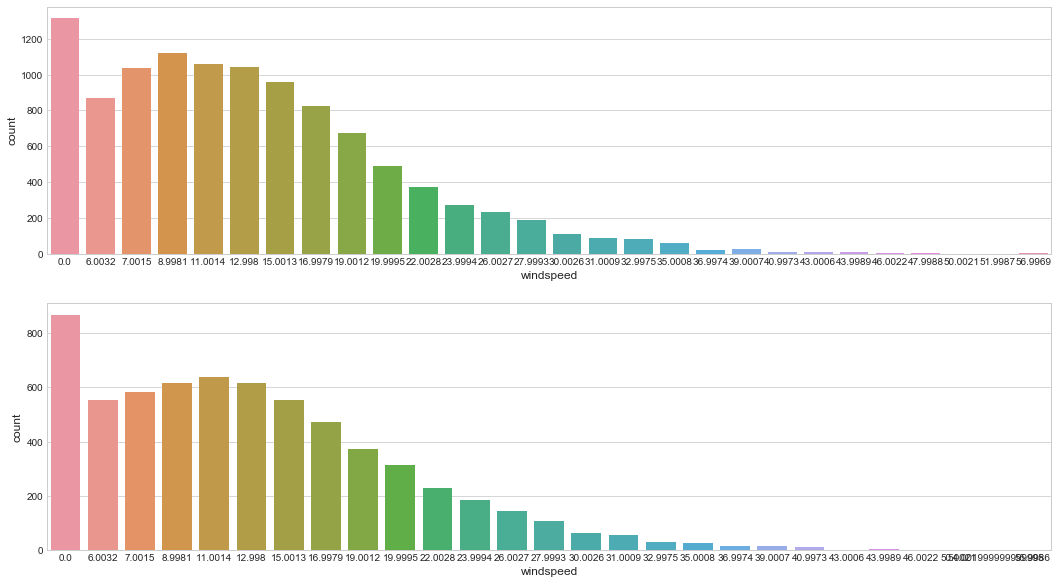

In [34]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

sns.countplot(data=train, x='windspeed', ax=axes[0])

sns.countplot(data=test, x='windspeed', ax=axes[1])

In [35]:
rf_model_wind = RandomForestRegressor()
f_columns = ["season", "weather", "humidity", "month", "temp", "year", "hour", "dayofweek", "atemp"]
x_train = train[f_columns]
y_r_label = train['registered']
y_c_label = train['casual']

print(x_train.shape)
print(y_r_label.shape)
print(y_c_label.shape)

(10886, 9)
(10886,)
(10886,)


In [36]:
x_test =  test[f_columns]
x_test.shape

(6493, 9)

In [37]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_r_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
test_registered_value = rf_model.predict(x_test)

In [39]:
test["registered"] = test_registered_value
test['registered'].isnull().sum()

0

In [40]:
### windspeed == 0 seems a bit strange
### predict windspeed by regression

train_wind_0 = train.loc[train['windspeed'] == 0]
train_wind_not_0 = train.loc[train['windspeed'] != 0]

print(train_wind_0.shape)
print(train_wind_not_0.shape)

(1313, 16)
(9573, 16)


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null int64
month         10886 non-null int64
hour          10886 non-null int64
dayofweek     10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


In [42]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,23.000000,6.000000


In [63]:
def predict_windspeed(data):
    
    data_wind_0 = data.loc[data['windspeed'] ==0 ]
    data_wind_not_0 = data.loc[data['windspeed'] !=0 ]
    
    feature_col = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
    
    rf_model_wind = RandomForestRegressor()
    rf_model_wind.fit(data_wind_not_0[feature_col], data_wind_not_0['windspeed'])
    
    wind_0_val = rf_model_wind.predict(X = data_wind_0[feature_col])
    
    data_wind_0['windspeed'] = wind_0_val
    
    results = data_wind_not_0.append(data_wind_0)
    
    return results

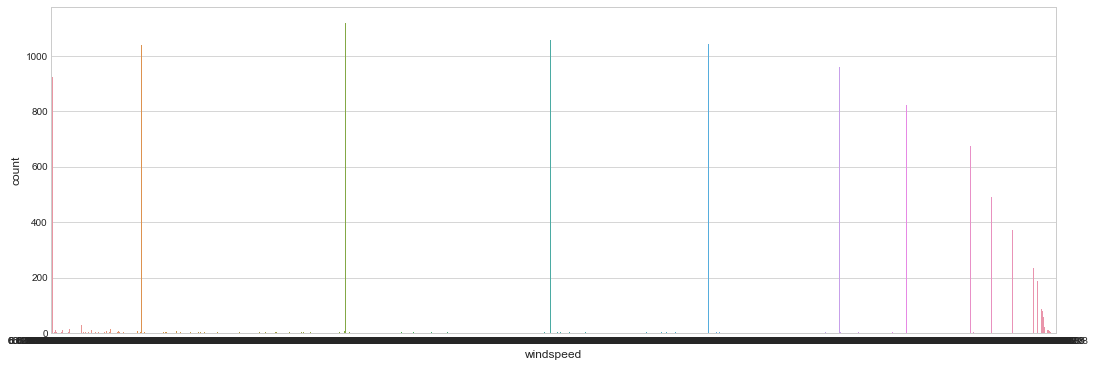

In [64]:
train_new = predict_windspeed(train)

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

sns.countplot(data=train_new, x='windspeed', ax=ax1)

In [65]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 5 to 10862
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
year          10886 non-null category
month         10886 non-null category
hour          10886 non-null category
dayofweek     10886 non-null category
dtypes: category(8), datetime64[ns](1), float64(3), int64(4)
memory usage: 1.1 MB


In [66]:
# numerical variables to categoryical variables

categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train_new[var] = train_new[var].astype("category")
    test[var] = test[var].astype("category")

In [67]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]


X_train = train_new[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
5,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
10,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
11,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
12,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
13,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 5 to 10862
Data columns (total 11 columns):
season        10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
year          10886 non-null category
hour          10886 non-null category
dayofweek     10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
dtypes: category(7), float64(3), int64(1)
memory usage: 821.5 KB


In [69]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [70]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 11 columns):
season        6493 non-null category
weather       6493 non-null category
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
year          6493 non-null category
hour          6493 non-null category
dayofweek     6493 non-null category
holiday       6493 non-null category
workingday    6493 non-null category
dtypes: category(7), float64(3), int64(1)
memory usage: 249.2 KB


In [71]:
# RMSLE & K-fold validataion

from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [72]:
max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [73]:
Y_train = train_new['count']
print(Y_train.shape)

(10886,)


In [76]:
%time score = cross_val_score(model, X_train, Y_train, cv=k_fold)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 12.3 s
Score= 0.94529


In [77]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
predictions = model.predict(X_test)

print(predictions.shape)

(6493,)


[Text(0.5,1,'test')]

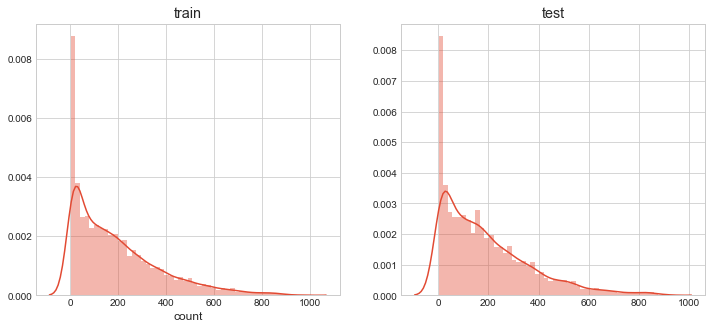

In [80]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(Y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

In [82]:
predictions

array([ 12.42,   5.44,   3.86, ..., 104.48, 102.06,  46.84])

In [85]:
from sklearn.metrics import mean_squared_error


tmp_predictions = model.predict(X_train)

tmp_predictions
#mean_squared_error(X_train["count"], Y_train)

array([  1.42,  59.06,  67.35, ..., 663.71, 130.78,  42.58])

In [86]:
mean_squared_error(tmp_predictions, Y_train)

251.347897898693